In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from regressors import stats
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Estilos
sns.set(style='whitegrid')

In [2]:
# Carga de datos
df = pd.read_csv('../data/processed/top_12_carros_vendidos.csv')
df = df[df['price'] < 50000]

In [3]:
columnas_categoricas = df.select_dtypes(include=['object']).columns.tolist() # Tomamos las variables categóricas
columnas_numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist() # Tomamos las variables numéricas

In [4]:
df = pd.get_dummies(df, columns=columnas_categoricas, drop_first=True)
columnas_bool = df.select_dtypes(include=['bool']).columns.tolist()
df[columnas_bool] = df[columnas_bool].astype(int)

In [5]:
df.head()

,year,price,mileage,tax,mpg,engineSize,model_ A Class,model_ Astra,model_ C Class,model_ Corsa,...,model_ Kuga,model_ Mokka X,model_ Polo,model_ Yaris,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017,16500,16570,125,58.9,2.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,2017,14250,55594,135,148.7,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2017,16000,45456,30,64.2,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2015,12600,78957,30,62.8,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2016,15100,29213,30,64.2,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Se separan las columnas
X_cols = list(set(df.columns) - set(['price', 'transmission_Other', 'tax', 'model_ A Class']))
Y_cols = ['price']

X = df[X_cols].values
Y = df[Y_cols]

# Se divide el dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

# Estandarización o normalización
sc_x = StandardScaler().fit(X)
sc_y = StandardScaler().fit(Y)

X_train = sc_x.transform(X_train)
X_test = sc_x.transform(X_test)
Y_train = sc_y.transform(Y_train)
Y_test = sc_y.transform(Y_test)

# Crear el modelo
model = LinearRegression(fit_intercept=False)
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

In [7]:
mse = round(mean_squared_error(Y_test, y_pred),3)
r2 = round(r2_score(Y_test, y_pred),3)

In [8]:
# model.intercept_ = model.intercept_[0] # Limpian los datos
model.coef_ = model.coef_.reshape(-1) # Limpian los datos

Y_test = Y_test.reshape(-1)

print('________Summary_________')
stats.summary(model, X_test, Y_test, X_cols) # Hace un resumen de los datos de test

________Summary_________
Residuals:
    Min      1Q  Median     3Q    Max
-3.4606 -0.1731  0.0358 0.2258 2.1715


Coefficients:
                        Estimate  Std. Error  t value  p value
_intercept              0.000000    0.003944   0.0000      1.0
fuelType_Hybrid         0.098900    0.004747  20.8353      0.0
model_ Yaris           -0.243251    0.004723 -51.5006      0.0
model_ C Class          0.101244    0.004600  22.0093      0.0
model_ Golf            -0.083752    0.004742 -17.6610      0.0
transmission_Manual    -0.084875    0.005880 -14.4353      0.0
model_ Corsa           -0.358377    0.004946 -72.4614      0.0
model_ Polo            -0.193014    0.005012 -38.5100      0.0
transmission_Semi-Auto  0.050111    0.005099   9.8278      0.0
model_ Mokka X         -0.229177    0.004590 -49.9310      0.0
engineSize              0.279734    0.005972  46.8437      0.0
mileage                -0.239653    0.005751 -41.6704      0.0
mpg                    -0.126853    0.005723 -22.1665

In [9]:
print('r2:', r2) # Por encima del 75 es un buen modelo, por encima de 85 es un excelente modelo, por encima de 90 es un modelo perfecto
print('mse:', mse) # Evalua el modelo entre 3 y -3

r2: 0.847
mse: 0.158


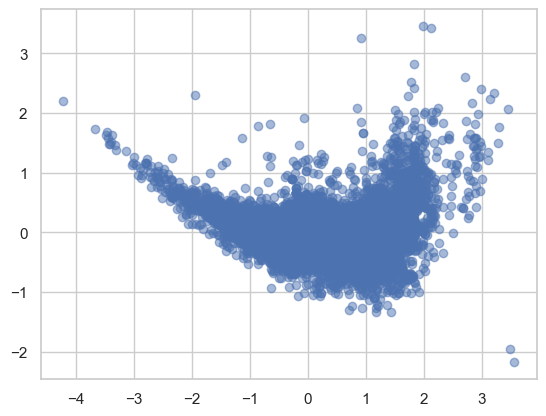

In [10]:
residuales = np.subtract(Y_test, y_pred.reshape(-1)) # reshape para que quede con las mismas dimensiones
plt.scatter(y_pred, residuales, alpha=0.5)
plt.show()